#CafChem tools for QM calculations using the Meta UMA MLIP.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MauricioCafiero/CafChem/blob/main/notebooks/Boltz_CafChem.ipynb)

## This notebook allows you to:
- create ASE atoms objects from SMILES strings or XYZ files.
- Optimize structures and calculate energies.
- Calculate vibrational frequencies.
- Calculate thermodynamics properties (H,G and S).
- Calculate thermodynamics for a reaction.
- perform simple dynamics.
- visualize molecules


## Requirements:
- This notebook will install rdkit, Fairchem and py3Dmol
- It will pull the CafChem tools from Github.
- It will install all needed libraries.
- small molecules can run an CPU, but using any GPU will greatly increase speed and is recommended for larger molecules.

### Install Fairchem and RDKit

In [1]:
! pip install py3Dmol
! pip install rdkit
! pip install fairchem-core

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.9/284.9 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 448.0/448.0 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 94.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 94.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.6 MB/s eta 0:00:00
   ━━━━━━

### Import Libraries

In [52]:
!git clone https://github.com/MauricioCafiero/CafChem.git

Cloning into 'CafChem'...
remote: Enumerating objects: 157, done.
remote: Counting objects: 100% (157/157), done.
remote: Compressing objects: 100% (153/153), done.
remote: Total 157 (delta 83), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (157/157), 1.72 MiB | 8.07 MiB/s, done.
Resolving deltas: 100% (83/83), done.


In [3]:
import torch
import pandas as pd
import shutil
import numpy as np
import pickle as pkl
from fairchem.core import FAIRChemCalculator, pretrained_mlip
import CafChem.CafChemQM_UMA as ccqm

## Set-up Fairchem
- Must have HF_TOKEN saved as a secret

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"

predictor = pretrained_mlip.get_predict_unit("uma-s-1", device=device)
calculator = FAIRChemCalculator(predictor, task_name="omol")
model = "UMA-OMOL"

checkpoints/uma-s-1.pt:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

## Basic energy and geometry calculations

In [ ]:
atoms = ccqm.smiles_to_atoms("N#N")

In [54]:
atoms = ccqm.smiles_to_atoms("c1cc(F)ccc1")

In [55]:
energy = ccqm.opt_energy(atoms, calculator, opt_flag = True)

Initial energy: -331.495678 ha
      Step     Time          Energy          fmax
BFGS:    0 10:40:55    -9020.462390        1.073605
BFGS:    1 10:40:55    -9020.475408        0.372215
BFGS:    2 10:40:55    -9020.480570        0.301000
BFGS:    3 10:40:56    -9020.484197        0.107275
BFGS:    4 10:40:56    -9020.484460        0.036962
Final energy: -331.496490 ha
Energy difference: -0.000811 ha


In [57]:
ccqm.atoms_to_xyz(atoms, "test")

with open("test.xyz", "r") as f:
    xyz_string = f.read()

ccqm.visualize_molecule(xyz_string)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## Calculate vibrational frequencies

In [58]:
all_vibs, vibs = ccqm.calculate_vibrations(atoms, calculator, struc_type = "nonlinear")

Vibrational frequency 1: 238.780 cm-1
Vibrational frequency 2: 405.525 cm-1
Vibrational frequency 3: 423.892 cm-1
Vibrational frequency 4: 514.192 cm-1
Vibrational frequency 5: 524.723 cm-1
Vibrational frequency 6: 623.957 cm-1
Vibrational frequency 7: 709.079 cm-1
Vibrational frequency 8: 779.690 cm-1
Vibrational frequency 9: 830.148 cm-1
Vibrational frequency 10: 848.223 cm-1
Vibrational frequency 11: 932.228 cm-1
Vibrational frequency 12: 1000.782 cm-1
Vibrational frequency 13: 1023.963 cm-1
Vibrational frequency 14: 1025.783 cm-1
Vibrational frequency 15: 1049.918 cm-1
Vibrational frequency 16: 1095.699 cm-1
Vibrational frequency 17: 1169.738 cm-1
Vibrational frequency 18: 1175.346 cm-1
Vibrational frequency 19: 1262.832 cm-1
Vibrational frequency 20: 1311.926 cm-1
Vibrational frequency 21: 1340.089 cm-1
Vibrational frequency 22: 1500.664 cm-1
Vibrational frequency 23: 1539.585 cm-1
Vibrational frequency 24: 1674.624 cm-1
Vibrational frequency 25: 1680.536 cm-1
Vibrational frequenc

## Calculate Thermodynamics

In [59]:
enthalpy, entropy, gibbs = ccqm.calculate_thermodynamics(energy, all_vibs, atoms, struc_type = "nonlinear", spin = 0, sym=2)

Enthalpy components at T = 310.15 K:
E_pot              -9020.484 eV
E_ZPE                  2.526 eV
Cv_trans (0->T)        0.040 eV
Cv_rot (0->T)          0.040 eV
Cv_vib (0->T)          0.070 eV
(C_v -> C_p)           0.027 eV
-------------------------------
H                  -9017.782 eV
Entropy components at T = 310.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0017268 eV/K        0.536 eV
S_rot              0.0011119 eV/K        0.345 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0003227 eV/K        0.100 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.000 eV
-------------------------------------------------
S                  0.0031604 eV/K        0.980 eV
Enthalpy components at T = 310.15 K:
E_pot              -9020.484 eV
E_ZPE                  2.526 eV
Cv_trans (0->T)        0.040 eV
Cv_rot (0->T)          0.040 eV
Cv_vib (0->T)          0.070 eV
(C_v -> C_p)           0.027 eV
-------------------------

In [60]:
print(f"Enthalpy: {enthalpy:.3f} kJ/mol")
print(f"Entropy: {entropy:.3f} kJ/molK")
print(f"Gibbs Energy: {gibbs:.3f} kJ/mol")

Enthalpy: -870080.667 kJ/mol
Entropy: 0.305 kJ/molK
Gibbs Energy: -870175.241 kJ/mol


## Automate Gibbs of Reaction

In [61]:
reactants = ["CCO", "O=O"]
reactant_stoich = [1,3]
reactant_charge = [0,0]
reactant_spin = [1,1]
reactant_struct = ["nonlinear", "linear"]
reactant_sym = [1,2]
products = ["O=C=O", "O"]
product_stoich = [2,3]
product_charge = [0,0]
product_spin = [1,1]
product_sym = [2,2]
product_struct = ["linear", "nonlinear"]

comb_methane = {"reactants": reactants, "reactant stoich": reactant_stoich, "reactant_charge": reactant_charge,
                "reactant_spin": reactant_spin, "reactant_struct": reactant_struct, "reactant_sym": reactant_sym,
                "products": products, "product_stoich": product_stoich,
                "product_charge": product_charge, "product_spin": product_spin,
                "product_struct": product_struct, "product_sym":product_sym}

In [62]:
g, h, s = ccqm.reaction_thermo(comb_methane, calculator, temp = 310.15, pressure = 101325.0)

Initial energy: -155.025055 ha
      Step     Time          Energy          fmax
BFGS:    0 10:43:11    -4218.449183        0.537091
BFGS:    1 10:43:11    -4218.456258        0.312258
BFGS:    2 10:43:12    -4218.461266        0.257722
BFGS:    3 10:43:12    -4218.465679        0.168835
BFGS:    4 10:43:12    -4218.467412        0.166806
BFGS:    5 10:43:13    -4218.469201        0.137958
BFGS:    6 10:43:13    -4218.470611        0.115616
BFGS:    7 10:43:13    -4218.471621        0.075180
Final energy: -155.025879 ha
Energy difference: -0.000825 ha
Vibrational frequency 1: 263.091 cm-1
Vibrational frequency 2: 281.234 cm-1
Vibrational frequency 3: 426.907 cm-1
Vibrational frequency 4: 806.017 cm-1
Vibrational frequency 5: 899.828 cm-1
Vibrational frequency 6: 1064.495 cm-1
Vibrational frequency 7: 1096.269 cm-1
Vibrational frequency 8: 1139.948 cm-1
Vibrational frequency 9: 1274.575 cm-1
Vibrational frequency 10: 1364.182 cm-1
Vibrational frequency 11: 1396.248 cm-1
Vibrational freq

## Basic Dynamics

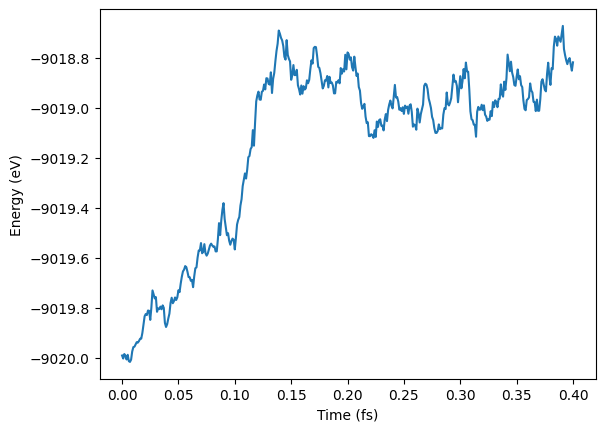

In [63]:
ccqm.run_dynamics("test", atoms, calculator, method = "langevin", total_steps=400)

In [64]:
ccqm.show_frame("test_md.xyz", frame_number = 150)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.